In [1]:
import keras
from keras.models import Sequential     # For initializing the Neural Net
from keras.layers import Conv2D  # 2D as we are dealing with images
from keras.layers import MaxPooling2D  # 2D pooling for images
from keras.layers import Flatten       # flattens the pooled image set 
from keras.layers import Dense         # Dense to bulid up layers
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
# initializing the Convolution Neural Net
classifier = Sequential()

In [135]:
# Step 1 - Convolution
# nb_filter <- num of convo layers 
# featuremap_rows <- num of rows in feature map
# featuremap_cols <- num of cols in feature map
# input_sape <- expected shape of the input shape (256,256,3) for TensorFlow backend
# activation <- The function to pass the convoluted data, use ReLU to break linearity
print(help(Conv2D))
classifier.add(Conv2D(64, (3,3), input_shape=(64,64,3), activation = 'relu'))

Help on class Conv2D in module keras.layers.convolutional:

class Conv2D(_Conv)
 |  2D convolution layer (e.g. spatial convolution over images).
 |  
 |  This layer creates a convolution kernel that is convolved
 |  with the layer input to produce a tensor of
 |  outputs. If `use_bias` is True,
 |  a bias vector is created and added to the outputs. Finally, if
 |  `activation` is not `None`, it is applied to the outputs as well.
 |  
 |  When using this layer as the first layer in a model,
 |  provide the keyword argument `input_shape`
 |  (tuple of integers, does not include the sample axis),
 |  e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
 |  in `data_format="channels_last"`.
 |  
 |  # Arguments
 |      filters: Integer, the dimensionality of the output space
 |          (i.e. the number output of filters in the convolution).
 |      kernel_size: An integer or tuple/list of 2 integers, specifying the
 |          width and height of the 2D convolution window.
 |        

ValueError: Input 0 is incompatible with layer conv2d_4: expected ndim=4, found ndim=2

In [136]:
# Step 2 - Pooling 
# pool_size <- size of the Pool matrix, mostly take 2X2
# print(help(MaxPooling2D))
classifier.add(MaxPooling2D(pool_size = (2,2)))

Help on class MaxPooling2D in module keras.layers.pooling:

class MaxPooling2D(_Pooling2D)
 |  Max pooling operation for spatial data.
 |  
 |  # Arguments
 |      pool_size: integer or tuple of 2 integers,
 |          factors by which to downscale (vertical, horizontal).
 |          (2, 2) will halve the input in both spatial dimension.
 |          If only one integer is specified, the same window length
 |          will be used for both dimensions.
 |      strides: Integer, tuple of 2 integers, or None.
 |          Strides values.
 |          If None, it will default to `pool_size`.
 |      padding: One of `"valid"` or `"same"` (case-insensitive).
 |      data_format: A string,
 |          one of `channels_last` (default) or `channels_first`.
 |          The ordering of the dimensions in the inputs.
 |          `channels_last` corresponds to inputs with shape
 |          `(batch, height, width, channels)` while `channels_first`
 |          corresponds to inputs with shape
 |         

ValueError: Input 0 is incompatible with layer max_pooling2d_4: expected ndim=4, found ndim=2

In [5]:
# Adding Second Convolution Layer
classifier.add(Conv2D(64, (3,3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2,2)))

In [6]:
# Adding Third Convolution Layer
classifier.add(Conv2D(64, (3,3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2,2)))

In [7]:
# Step 3 - Flattening 
classifier.add(Flatten())

In [8]:
# Build up the Hidden Layer of the Neural Network 
classifier.add(Dense(units = 128, activation = 'relu'))

In [9]:
classifier.add(Dropout(0.5))

In [10]:
# Build up the Output Layer of the Neural Network 
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [11]:
# Compiling the CNN
classifier.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
# Fitting the CNN to the images 
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Target size is the dimension that is expected by the CNN
training_set = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 64),
        batch_size=batch_size,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=batch_size,
        class_mode='binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [39]:
# Training the CNN Model 
classifier.fit_generator(training_set,
                    steps_per_epoch=8000/batch_size, # Num of samples can be taken as steps
                    epochs=90,
                    validation_data=test_set,
                    validation_steps=2000/ batch_size, # Corresponds to num of samples in the test
                    workers = 12,
                    max_q_size = 100)

/Users/Mac-NB/Envs/AI/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=250.0, epochs=90, validation_data=<keras.pre..., validation_steps=62.5, workers=12, max_queue_size=100)`
  


Epoch 1/90
250/250 [==============================] - 187s - loss: 0.3012 - acc: 0.8699 - val_loss: 0.3895 - val_acc: 0.8445
Epoch 2/90
250/250 [==============================] - 173s - loss: 0.2992 - acc: 0.8700 - val_loss: 0.3479 - val_acc: 0.8555
Epoch 3/90
250/250 [==============================] - 173s - loss: 0.2988 - acc: 0.8680 - val_loss: 0.3294 - val_acc: 0.8625
Epoch 4/90
250/250 [==============================] - 173s - loss: 0.2839 - acc: 0.8761 - val_loss: 0.3551 - val_acc: 0.8445
Epoch 5/90
250/250 [==============================] - 172s - loss: 0.2825 - acc: 0.8806 - val_loss: 0.3293 - val_acc: 0.8630
Epoch 6/90
250/250 [==============================] - 172s - loss: 0.2805 - acc: 0.8822 - val_loss: 0.3367 - val_acc: 0.8630
Epoch 7/90
250/250 [==============================] - 173s - loss: 0.2843 - acc: 0.8788 - val_loss: 0.3628 - val_acc: 0.8475
Epoch 8/90
250/250 [==============================] - 174s - loss: 0.2596 - acc: 0.8908 - val_loss: 0.3303 - val_acc: 0.8645


250/250 [==============================] - 173s - loss: 0.1469 - acc: 0.9420 - val_loss: 0.3998 - val_acc: 0.8865
Epoch 67/90
250/250 [==============================] - 173s - loss: 0.1416 - acc: 0.9406 - val_loss: 0.3827 - val_acc: 0.8945
Epoch 68/90
250/250 [==============================] - 173s - loss: 0.1398 - acc: 0.9420 - val_loss: 0.4381 - val_acc: 0.8855
Epoch 69/90
250/250 [==============================] - 173s - loss: 0.1404 - acc: 0.9434 - val_loss: 0.3914 - val_acc: 0.8805
Epoch 70/90
250/250 [==============================] - 172s - loss: 0.1316 - acc: 0.9494 - val_loss: 0.4159 - val_acc: 0.8725
Epoch 71/90
250/250 [==============================] - 173s - loss: 0.1269 - acc: 0.9527 - val_loss: 0.3743 - val_acc: 0.8830
Epoch 72/90
250/250 [==============================] - 173s - loss: 0.1289 - acc: 0.9474 - val_loss: 0.3989 - val_acc: 0.8690
Epoch 73/90
250/250 [==============================] - 174s - loss: 0.1248 - acc: 0.9521 - val_loss: 0.4200 - val_acc: 0.8775
Epoc

In [40]:
classifier.save('model_test.h5')
import numpy as np
from keras.preprocessing import image

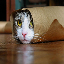

In [152]:
# Load image
test_single_image = image.load_img('dataset/single_prediction/cat_or_dog_5.jpg', target_size=(64,64))
test_single_image

In [153]:
# Converts the Image into an array
test_single_image = image.img_to_array(test_single_image)
test_single_image.shape

(64, 64, 3)

In [154]:
# Adding a new dimension to the image where axis is the position to specify the index
test_single_image = np.expand_dims(test_single_image, axis=0)

In [155]:
result = classifier.predict(test_single_image)
result

array([[ 1.]], dtype=float32)

In [156]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [157]:
def res_conversion(val):
    if val == 1:
        print("it is a Dog !! Woof woof")
    else:
        print("it is a Cat !! meowww")

res_conversion(result[0][0])

it is a Dog !! Woof woof


In [141]:
# importing saved model 
from keras.models import load_model

In [142]:
model = load_model('model_test.h5')
model.compile(loss='binary_crossentropy',
             optimizer= 'adam',
             metrics=['accuracy'])

In [143]:
res_val = model.predict_classes(test_single_image)
res_conversion(res_val[0][0])

1/1 [==============================] - 0s
it is a Cat !! meowww
